In [1]:
library(ggplot2)
library(RMySQL)

Loading required package: DBI



In [2]:
mysqlconnection = dbConnect(RMySQL::MySQL(),
                            dbname='energy_1',
                            host='localhost',
                            user='admin',
                            password='admin')

In [3]:
dbListTables(mysqlconnection)
energy = dbSendQuery(mysqlconnection, "select * from energy") #Acces data
data.frame = fetch(energy)
datos = data.frame
print(data.frame)    

[1] "PWH"        "energy"     "power_hour"

    voltage current power energy frecuency powerfactor                time
1       112   0.413  28.7  57542      60.4        0.62 2023-02-28 10:38:52
2       112   0.395  27.6  57542      60.3        0.63 2023-02-28 10:38:57
3       112   0.414  28.7  57542      60.3        0.62 2023-02-28 10:39:01
4       112   0.394  27.6  57542      60.4        0.63 2023-02-28 10:39:05
5       112   0.401  27.9  57542      60.4        0.62 2023-02-28 10:39:09
6       112   0.392  27.4  57542      60.4        0.63 2023-02-28 10:39:13
7       112   0.394  27.6  57542      60.4        0.63 2023-02-28 10:39:17
8       111   0.394  27.5  57542      60.3        0.63 2023-02-28 10:39:22
9       112   0.390  27.3  57542      60.4        0.63 2023-02-28 10:39:26
10      112   0.393  27.5  57542      60.5        0.62 2023-02-28 10:39:30
11      112   0.392  27.4  57543      60.4        0.63 2023-02-28 10:39:34
12      112   0.396  27.6  57543      60.4        0.62 2023-02-28 10:39:38
13      112   0.395  27.6

In [4]:
install.packages("lubridate")     # Install lubridate package
library("lubridate")              # Load lubridate package
install.packages("RColorBrewer")
library("RColorBrewer")

Installing package into ‘/home/datamaking/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/home/datamaking/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



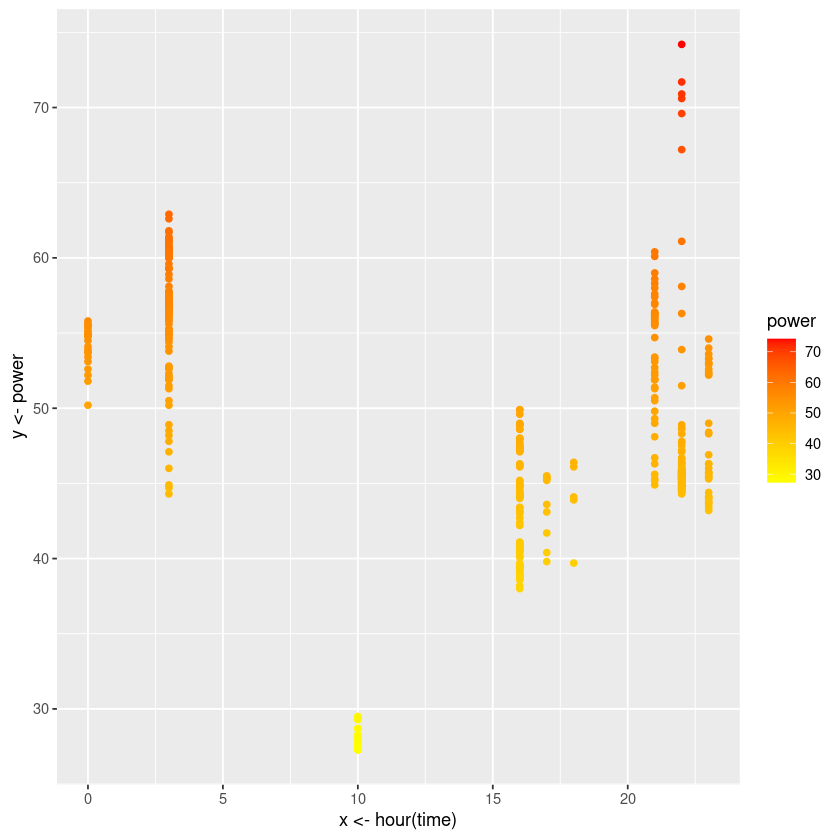

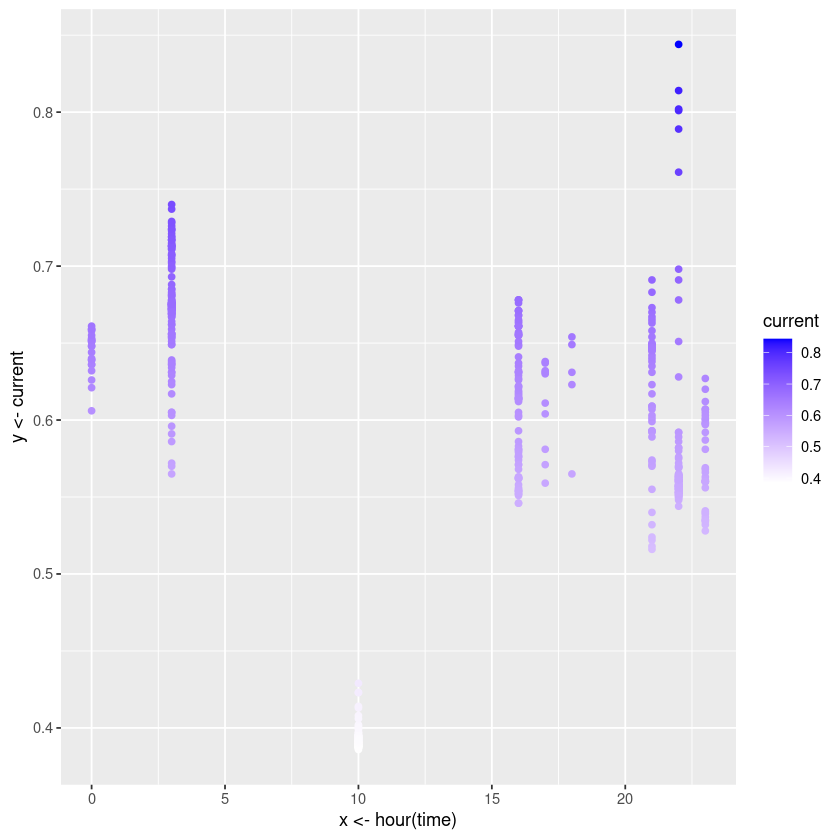

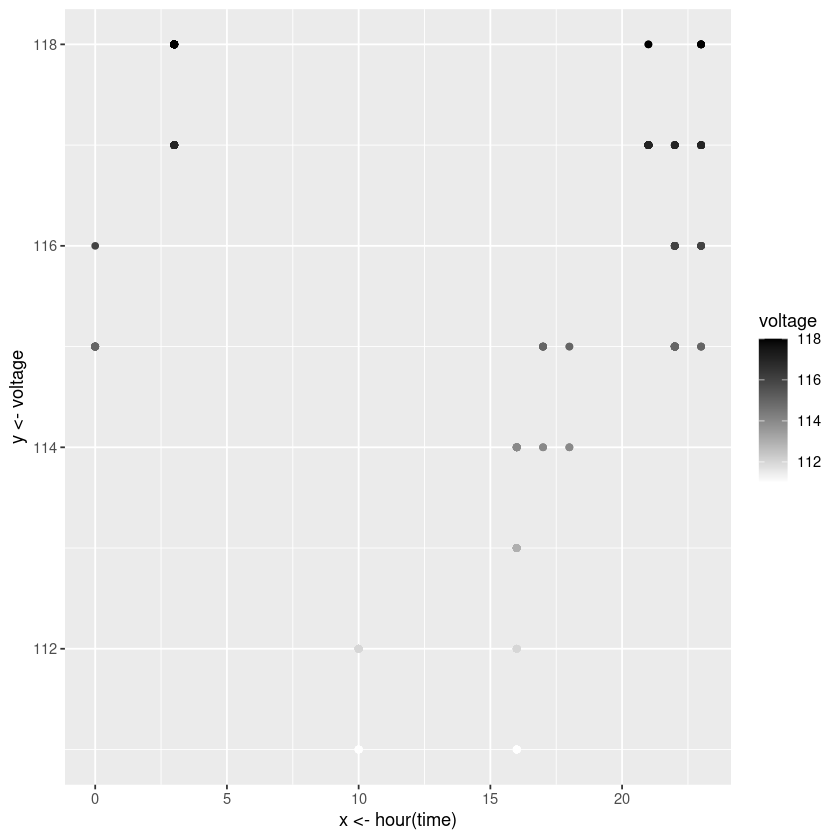

In [5]:
#Potencia consumida segùn la hora del dìa
p <- ggplot(data <- data.frame)+
                geom_point(mapping = aes(x <- hour(time), y <- power, color = power))
p + scale_color_gradient(low= "yellow" , high= "red") 
#Corriente consumida segùn la hora del dìa
i <- ggplot(data <- data.frame)+
                geom_point(mapping = aes(x <- hour(time), y <- current, color = current))
i + scale_color_gradient(low= "white" , high= "blue")
#Voltaje consumida segùn la hora del dìa
v <- ggplot(data <- data.frame)+
                geom_point(mapping = aes(x <- hour(time), y <- voltage, color = voltage))
v + scale_color_gradient(low= "white" , high= "black")

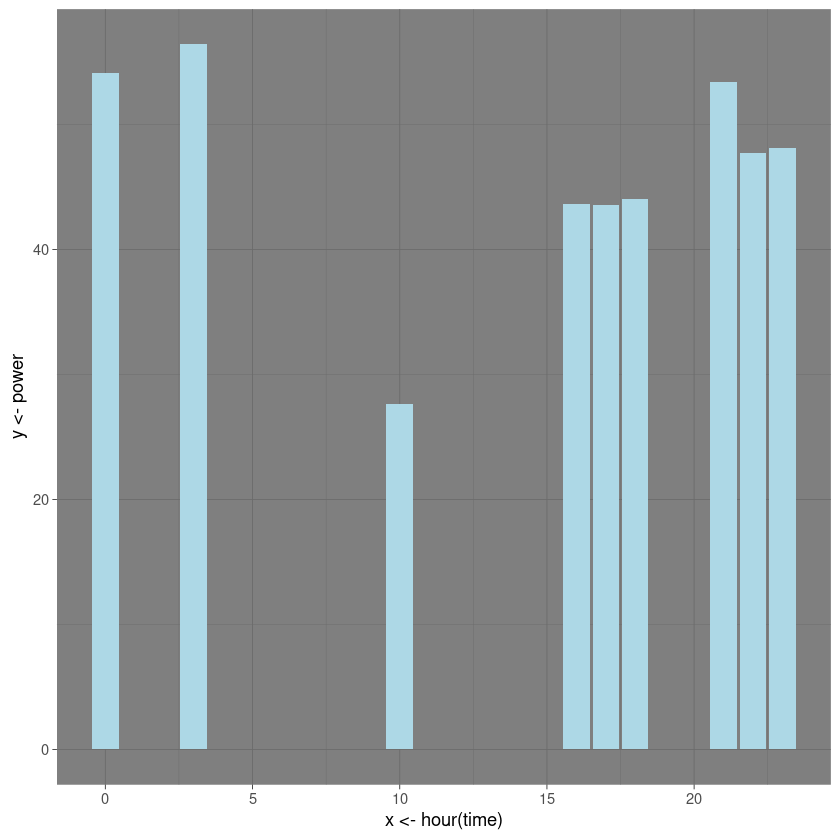

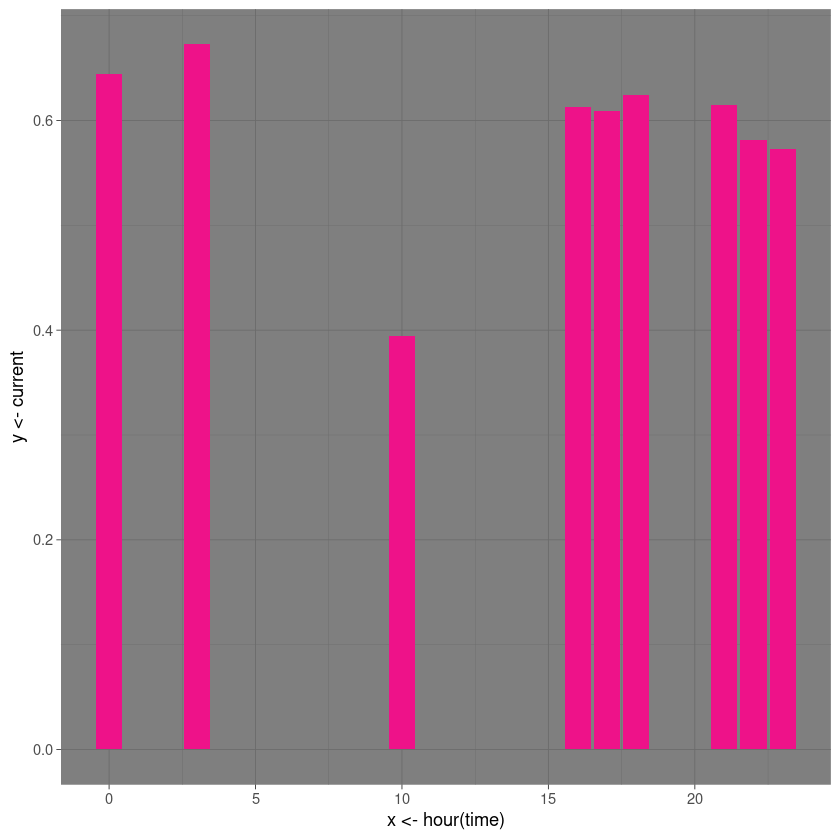

In [6]:
#Distribuciòn
#Potencia consumida segùn la hora del dìa
p <- ggplot(data <- data.frame, aes(x <- hour(time), y <- power))+
                geom_bar(fill= "lightblue", stat="summary", fun="mean")+
                theme_dark()
p 
#Corriente consumida segùn la hora del dìa
i <- ggplot(data <- data.frame, aes(x <- hour(time), y <- current))+
                geom_bar(fill= "deeppink2", stat="summary", fun="mean")+
                theme_dark()
i 

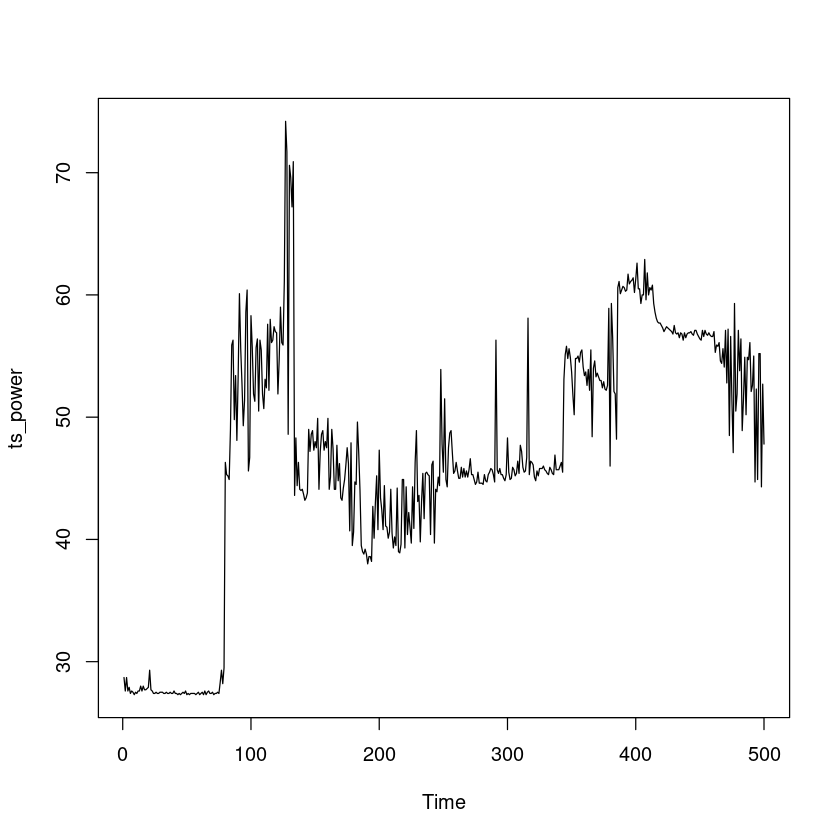

In [7]:
#Time series linea de tendencia
ts_power = ts(data.frame[, "power"])
plot(ts_power)

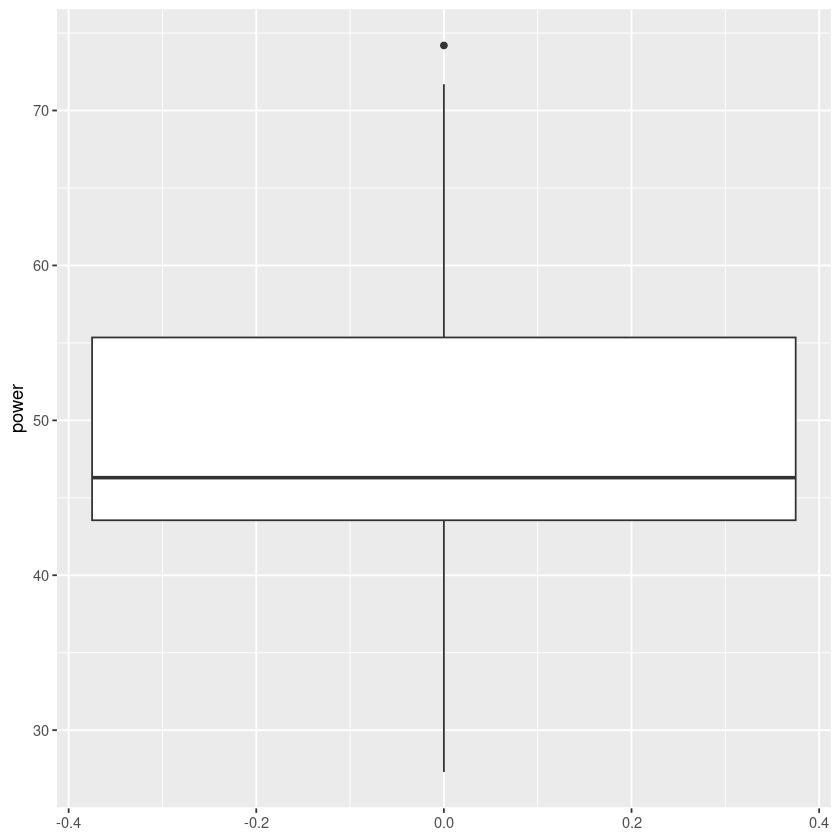

In [8]:
# Boxplot, diagrama de cajas y bigotes
g1 <- ggplot (data <- data.frame , aes(y = power))+
             geom_boxplot()
g1
